In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
data = pd.read_csv('../data/data.csv')

# Display the first few rows of the dataset
data.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


In [3]:
# Number of rows and columns
rows, columns = data.shape
print(f'The dataset contains {rows} rows and {columns} columns.')

# Data types of each column
data.dtypes

The dataset contains 95662 rows and 16 columns.


TransactionId            object
BatchId                  object
AccountId                object
SubscriptionId           object
CustomerId               object
CurrencyCode             object
CountryCode               int64
ProviderId               object
ProductId                object
ProductCategory          object
ChannelId                object
Amount                  float64
Value                     int64
TransactionStartTime     object
PricingStrategy           int64
FraudResult               int64
dtype: object

In [6]:
# Summary Statistics
numeric_columns = data.select_dtypes(include=['number']).columns
print("Summary Statistics:\n", data[numeric_columns].describe())

# Skewness and kurtosis
print("\nSkewness:\n", data[numeric_columns].skew())
print("\nKurtosis:\n", data[numeric_columns].kurt())

Summary Statistics:
        CountryCode        Amount         Value  PricingStrategy   FraudResult
count      95662.0  9.566200e+04  9.566200e+04     95662.000000  95662.000000
mean         256.0  6.717846e+03  9.900584e+03         2.255974      0.002018
std            0.0  1.233068e+05  1.231221e+05         0.732924      0.044872
min          256.0 -1.000000e+06  2.000000e+00         0.000000      0.000000
25%          256.0 -5.000000e+01  2.750000e+02         2.000000      0.000000
50%          256.0  1.000000e+03  1.000000e+03         2.000000      0.000000
75%          256.0  2.800000e+03  5.000000e+03         2.000000      0.000000
max          256.0  9.880000e+06  9.880000e+06         4.000000      1.000000

Skewness:
 CountryCode         0.000000
Amount             51.098490
Value              51.291086
PricingStrategy     1.659057
FraudResult        22.196295
dtype: float64

Kurtosis:
 CountryCode           0.000000
Amount             3363.127739
Value              3378.069274


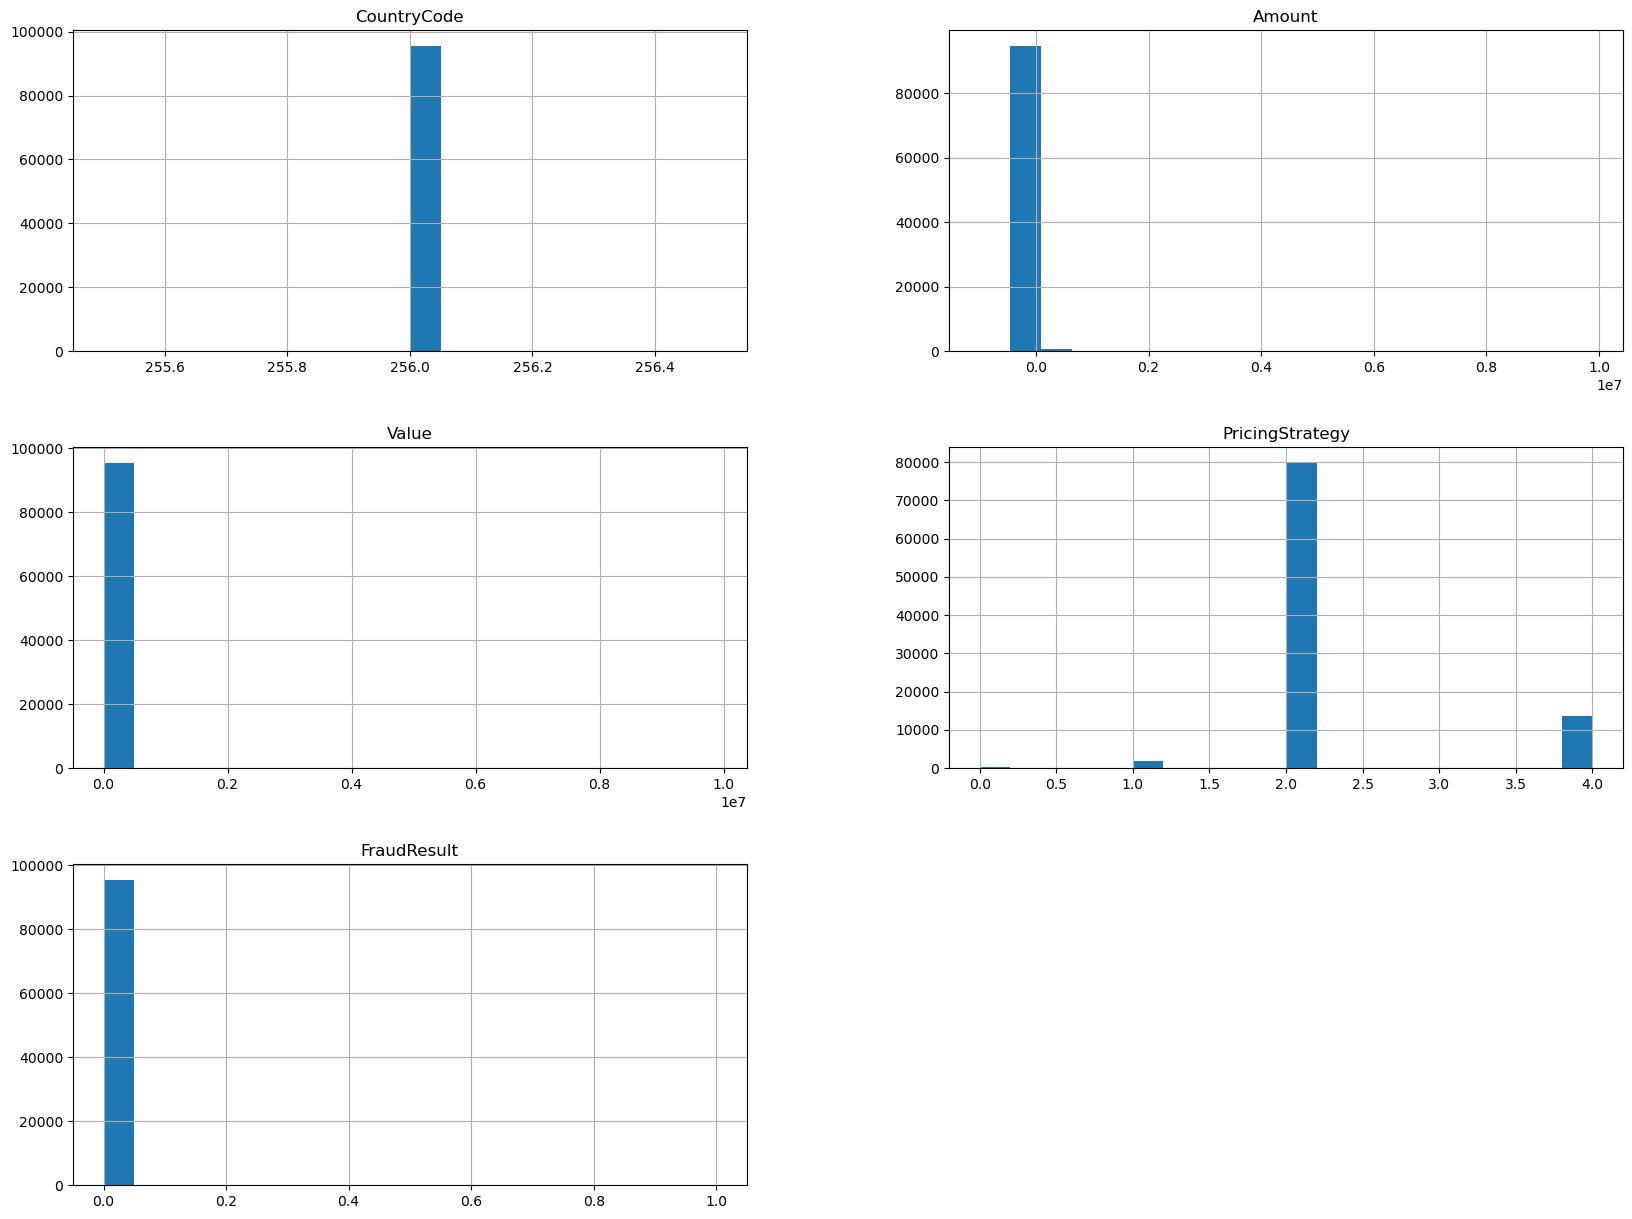

In [7]:
# Histograms for numerical features 
data[numeric_columns].hist(bins=20, figsize=(20, 15))
plt.show()


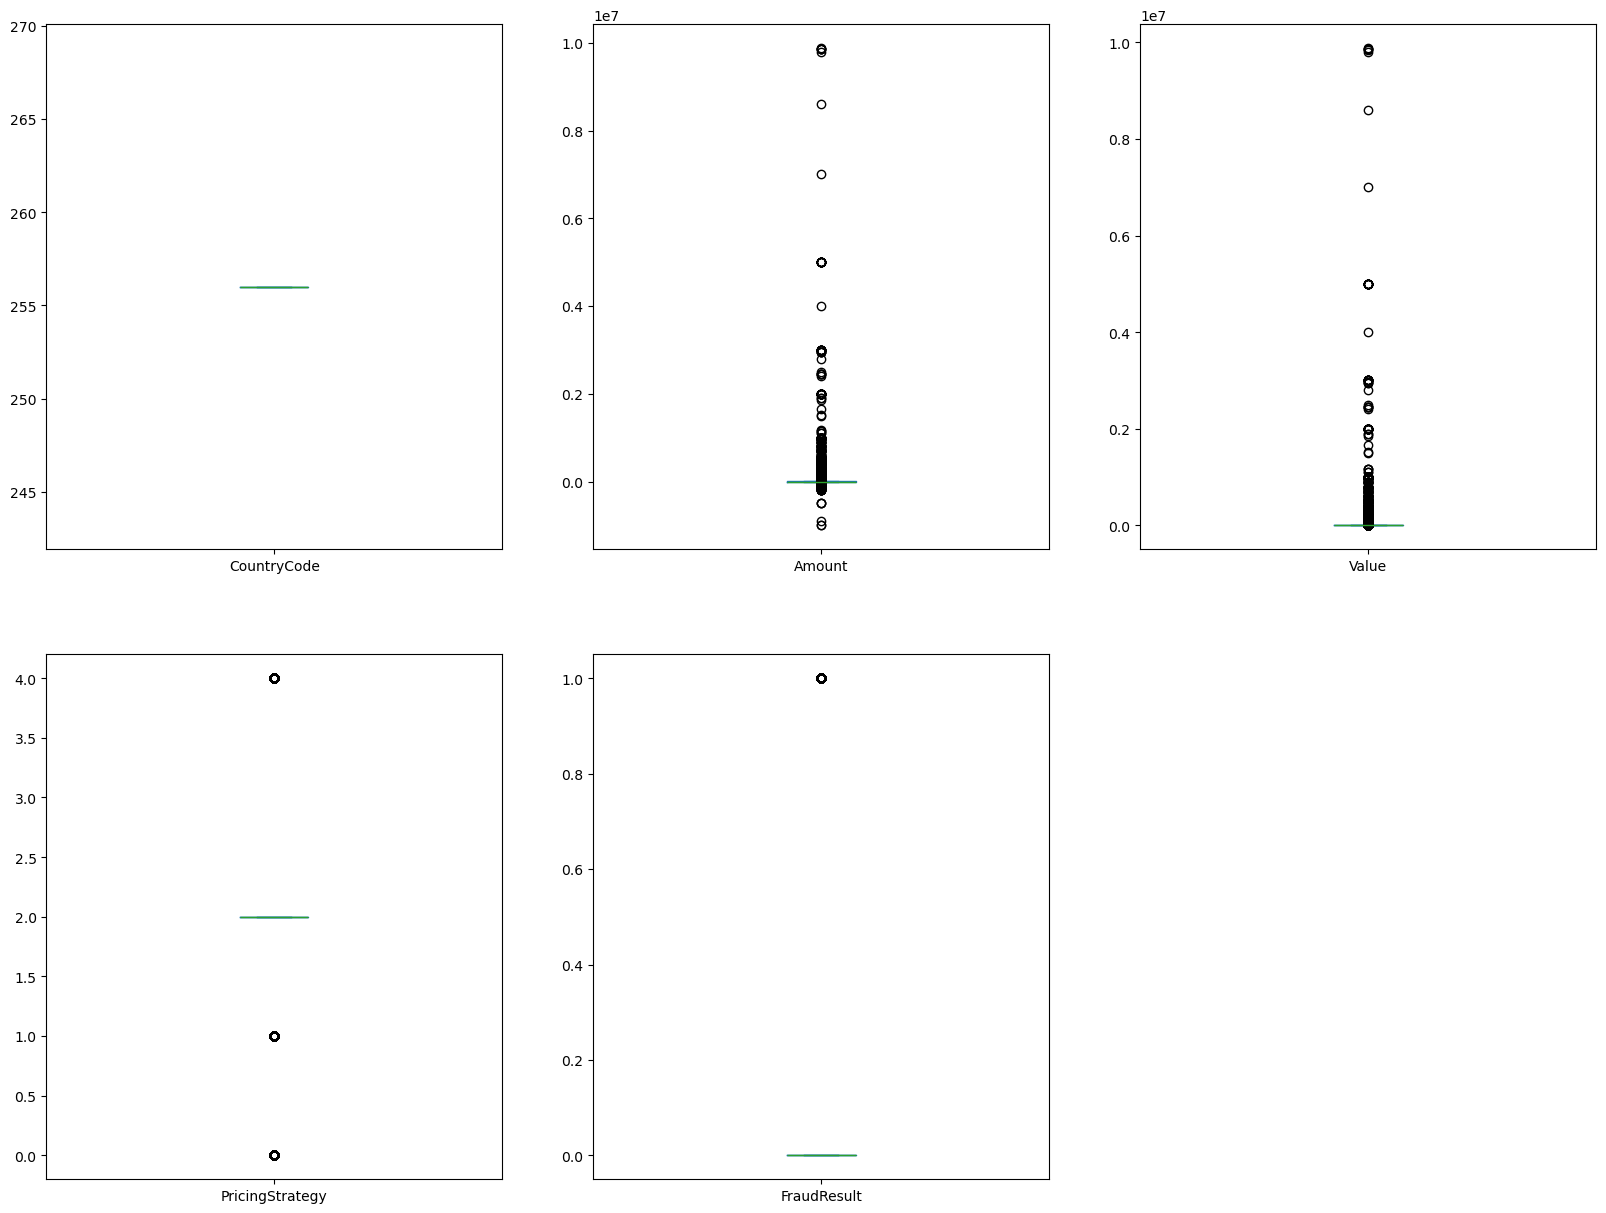

In [9]:
# Box plots for numerical features
data[numeric_columns].plot(kind='box', subplots=True, layout=(int(np.ceil(len(numeric_columns)/3)), 3), figsize=(20, 15))
plt.show()

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


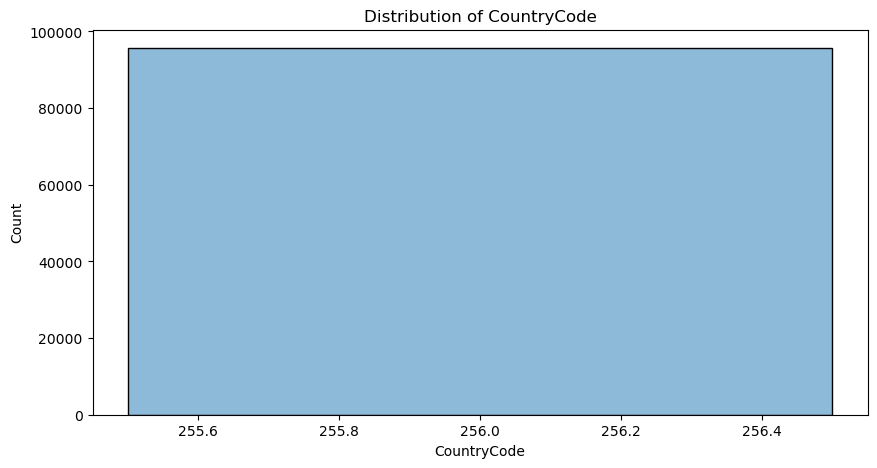

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


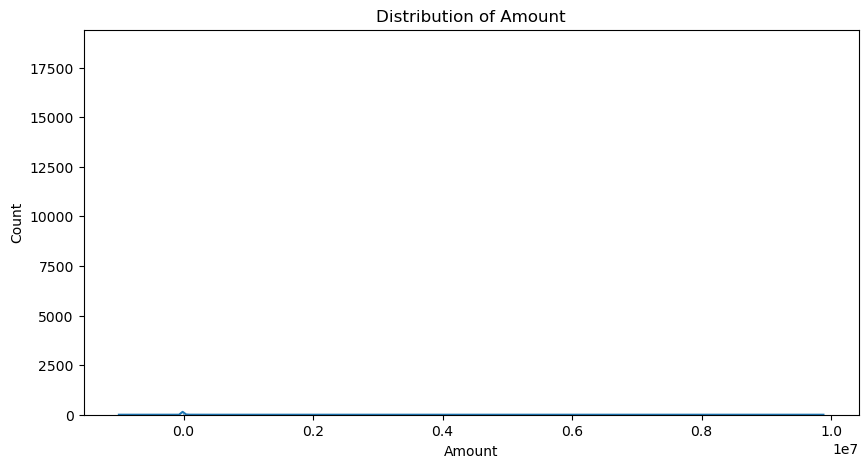

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


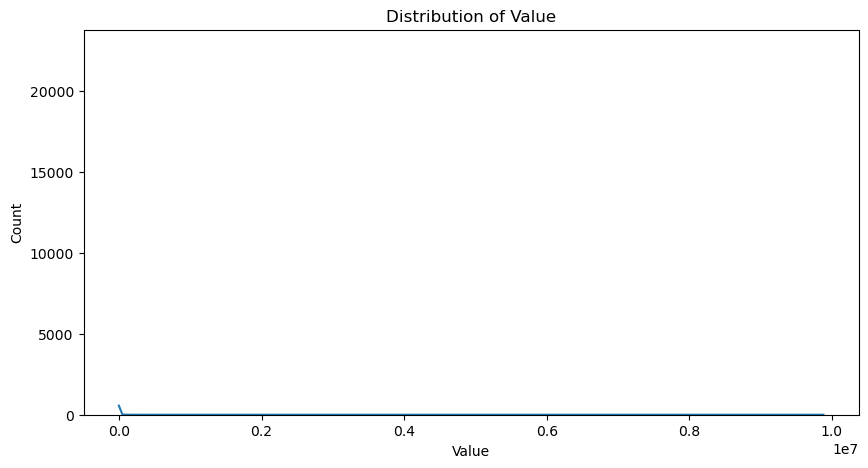

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


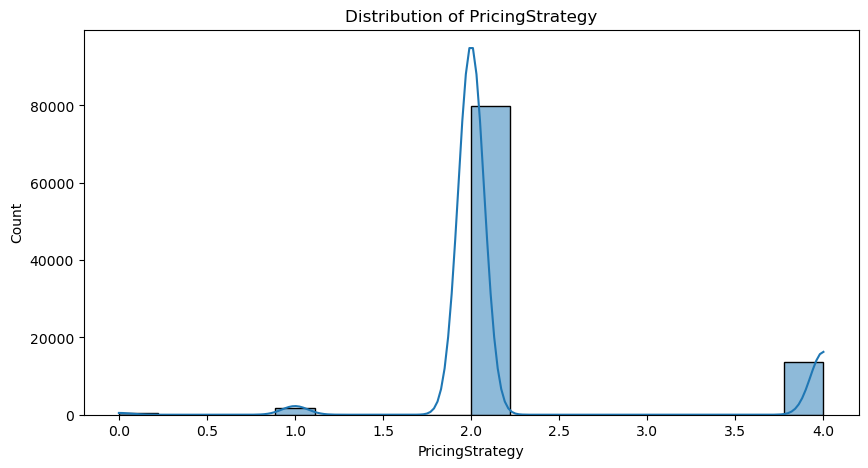

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


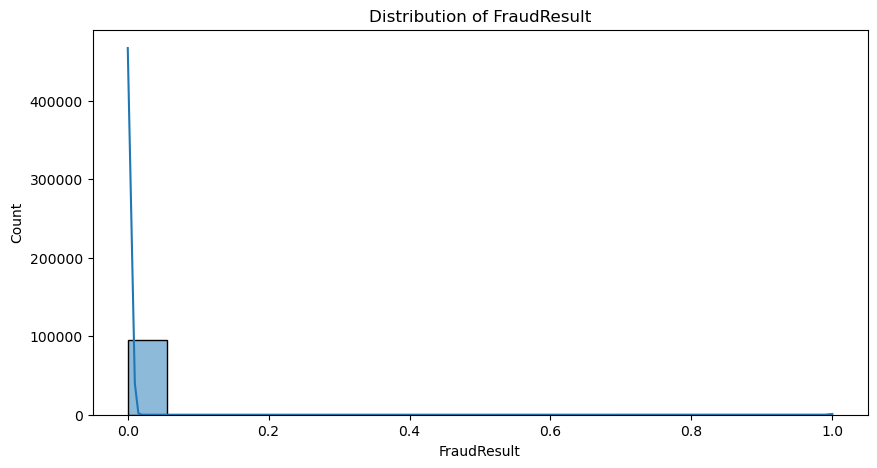

In [10]:
# Distribution of Numerical Features
for column in numeric_columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(data[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

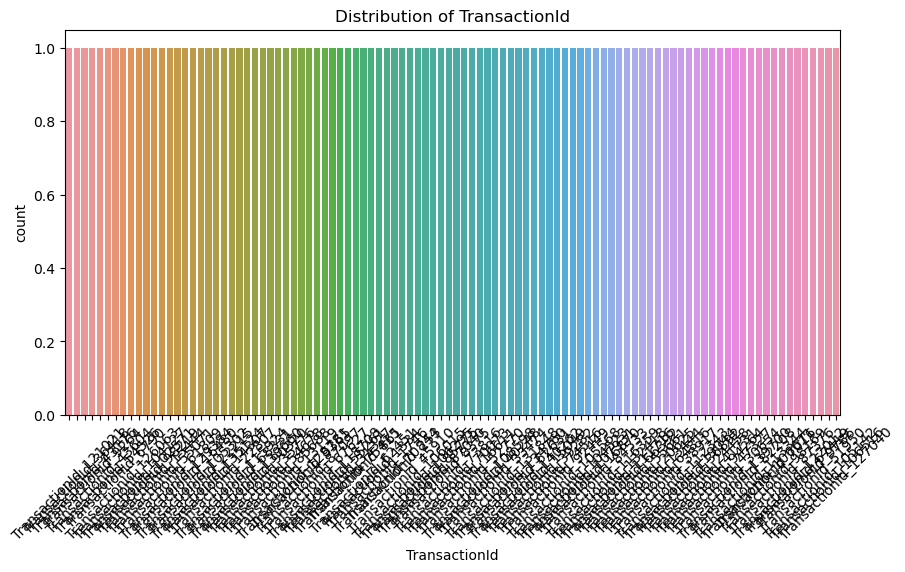

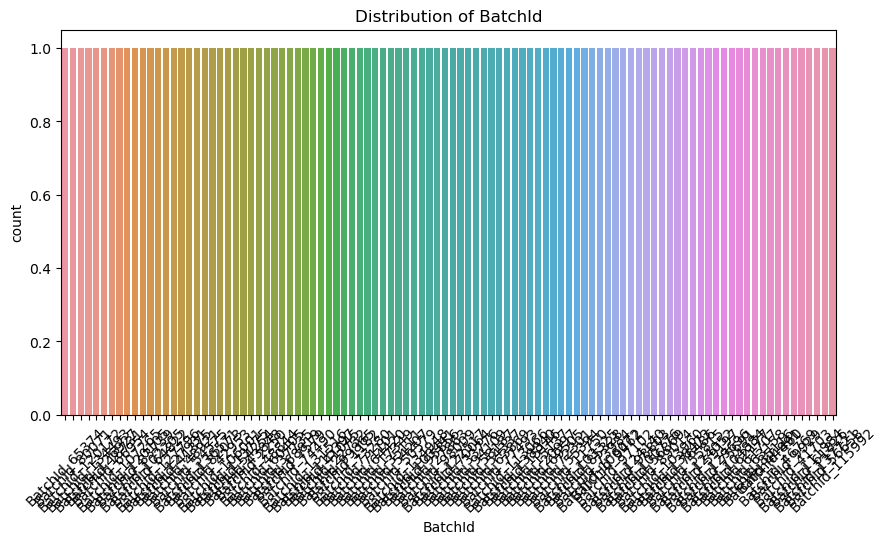

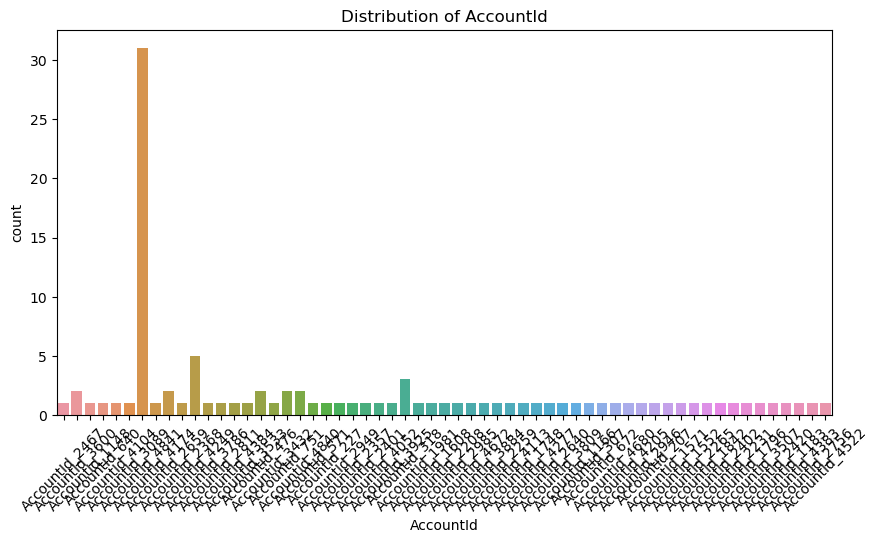

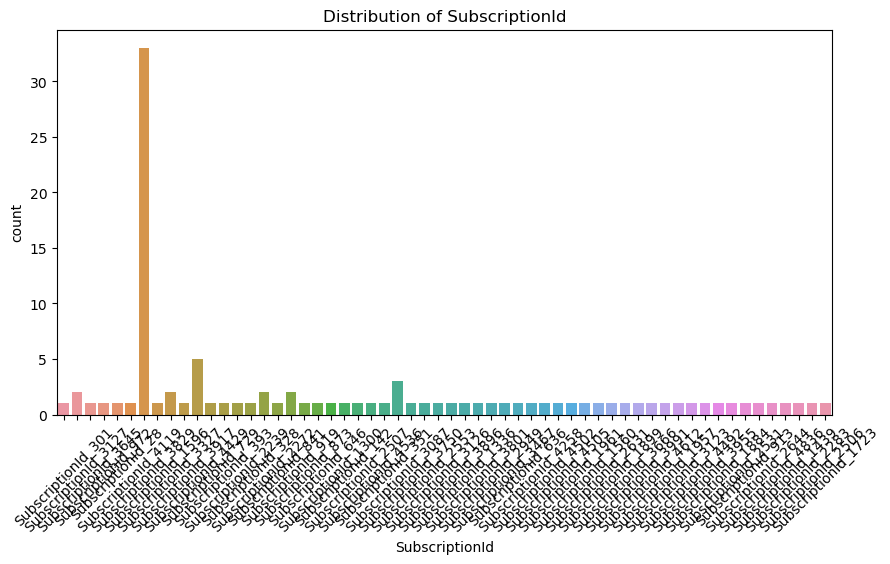

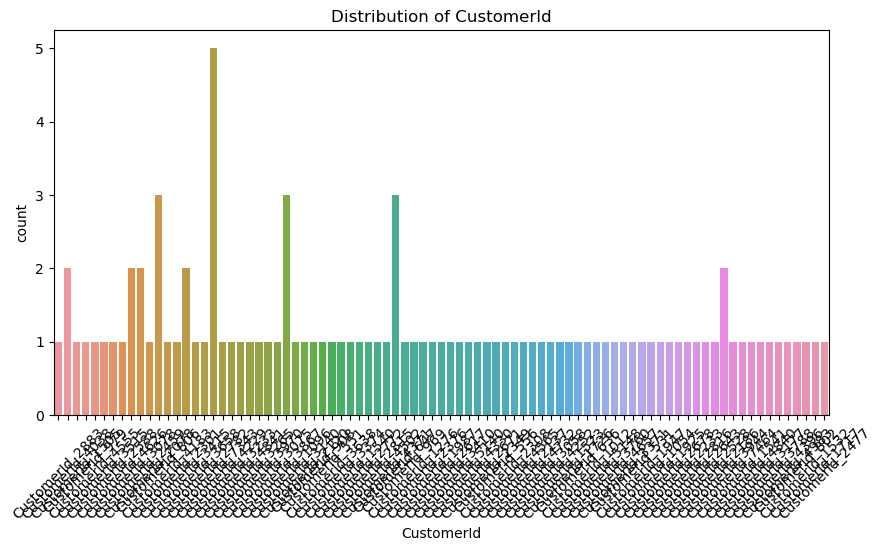

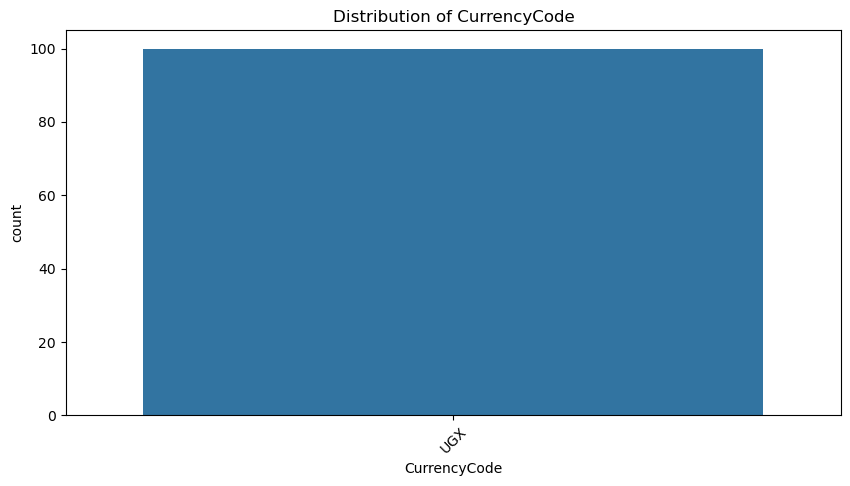

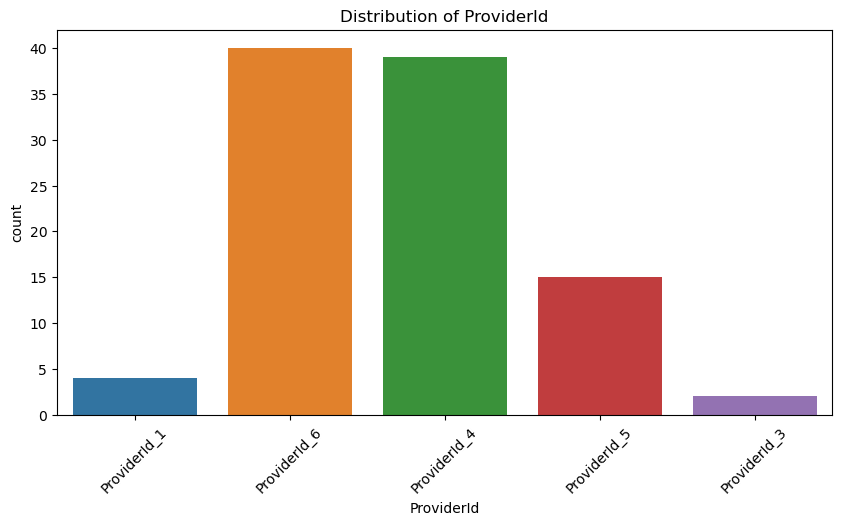

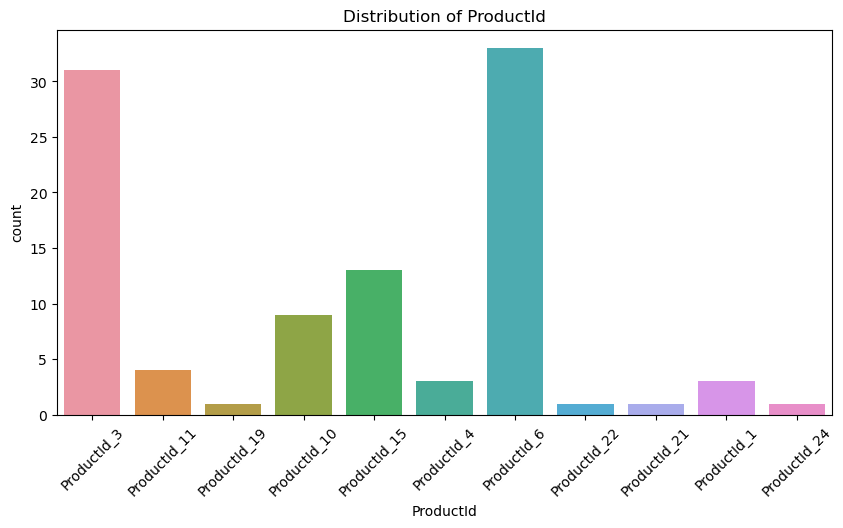

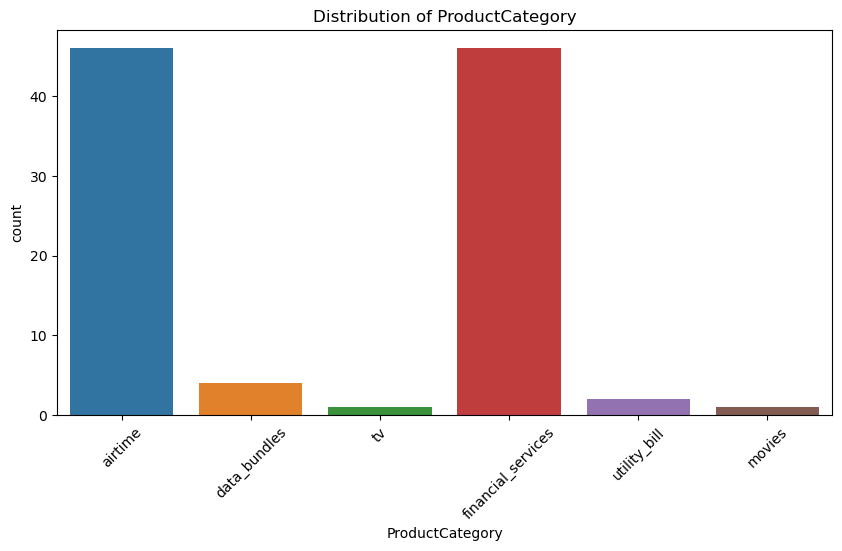

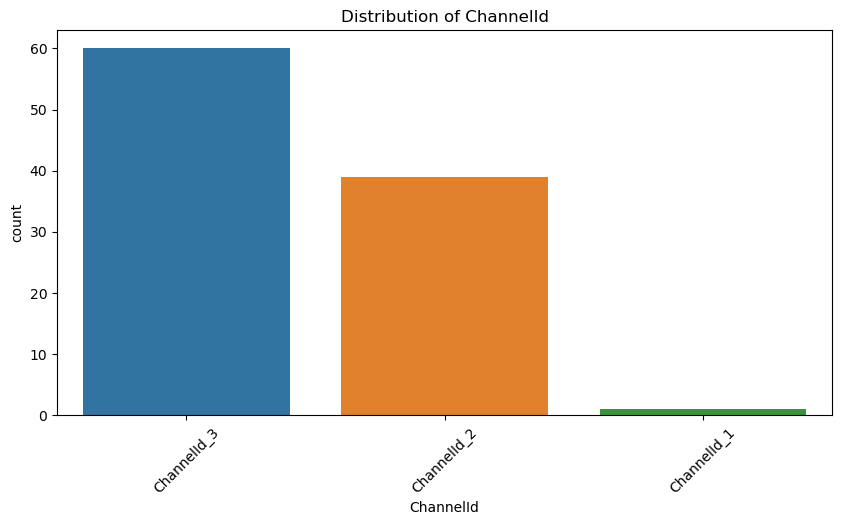

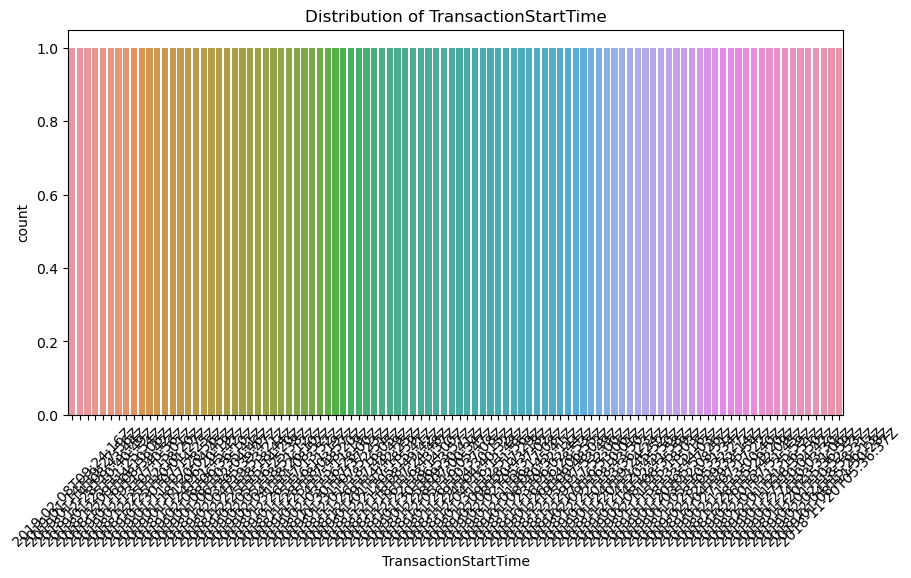

In [12]:
# Distribution of Categorical Features
categorical_columns = data.select_dtypes(include=['object']).columns

for column in categorical_columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=column, data=sampled_data)
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)  # Rotate x labels for better readability
    plt.show()

C:\Users\User\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


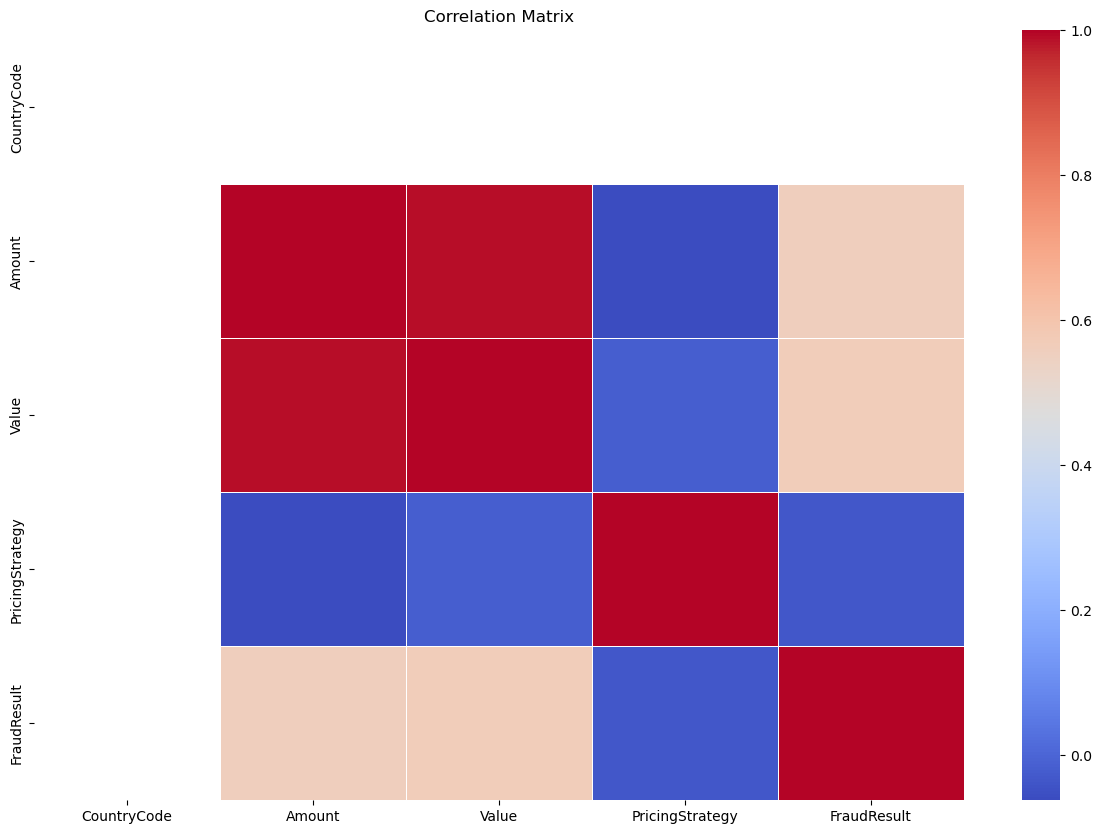

In [14]:
# Correlation Analysis
# Select only numeric columns
numeric_data = data[numeric_columns]

# Correlation matrix
corr_matrix = numeric_data.corr()
# Heatmap of the correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

Missing Values:
 TransactionId           0
BatchId                 0
AccountId               0
SubscriptionId          0
CustomerId              0
CurrencyCode            0
CountryCode             0
ProviderId              0
ProductId               0
ProductCategory         0
ChannelId               0
Amount                  0
Value                   0
TransactionStartTime    0
PricingStrategy         0
FraudResult             0
dtype: int64
Percentage of Missing Values:
 TransactionId           0.0
BatchId                 0.0
AccountId               0.0
SubscriptionId          0.0
CustomerId              0.0
CurrencyCode            0.0
CountryCode             0.0
ProviderId              0.0
ProductId               0.0
ProductCategory         0.0
ChannelId               0.0
Amount                  0.0
Value                   0.0
TransactionStartTime    0.0
PricingStrategy         0.0
FraudResult             0.0
dtype: float64


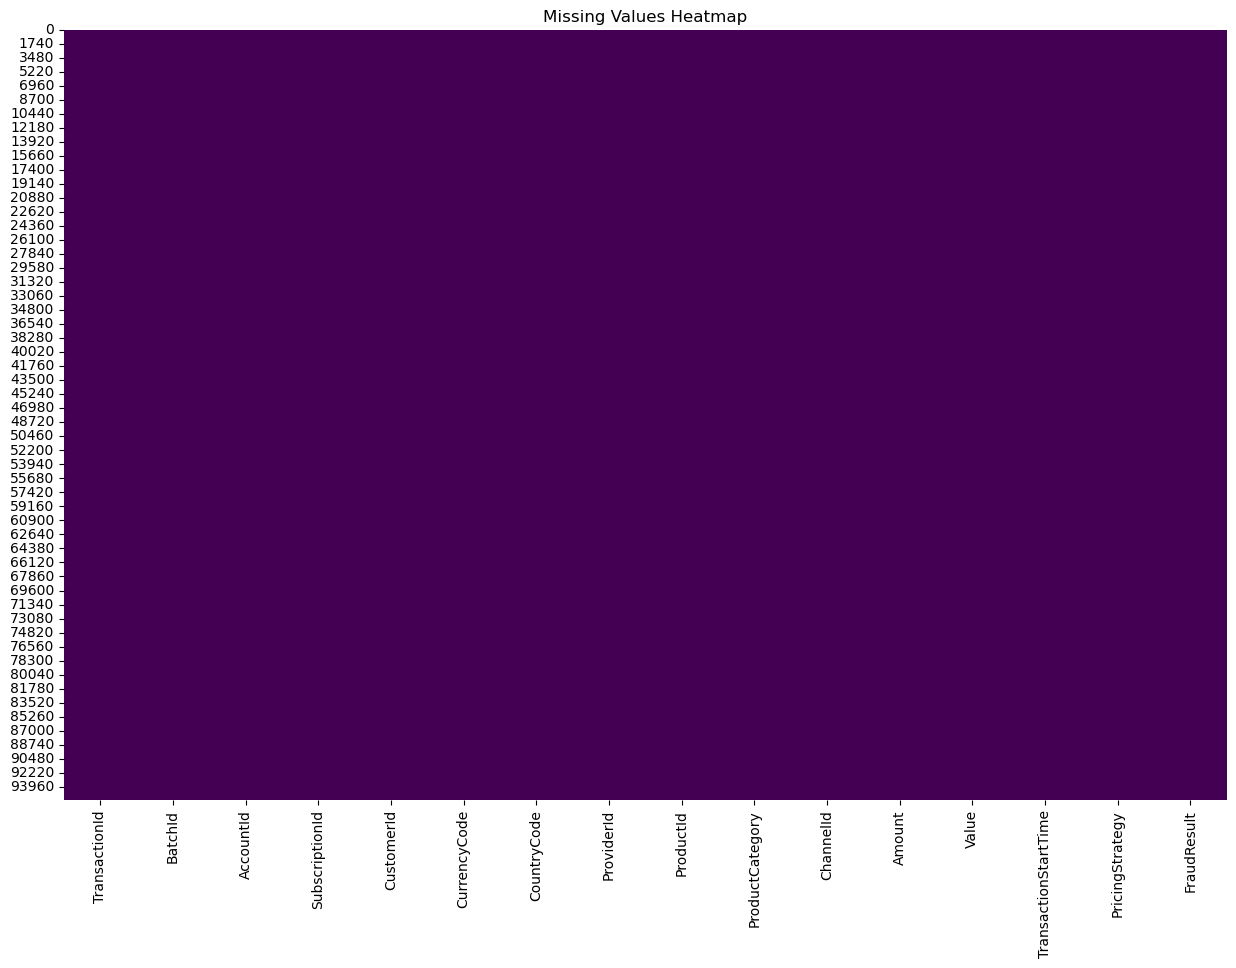

In [15]:
# Identifying Missing Values
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

# Percentage of missing values
missing_percentage = (missing_values / data.shape[0]) * 100
print("Percentage of Missing Values:\n", missing_percentage)

# Visualizing missing values
plt.figure(figsize=(15, 10))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

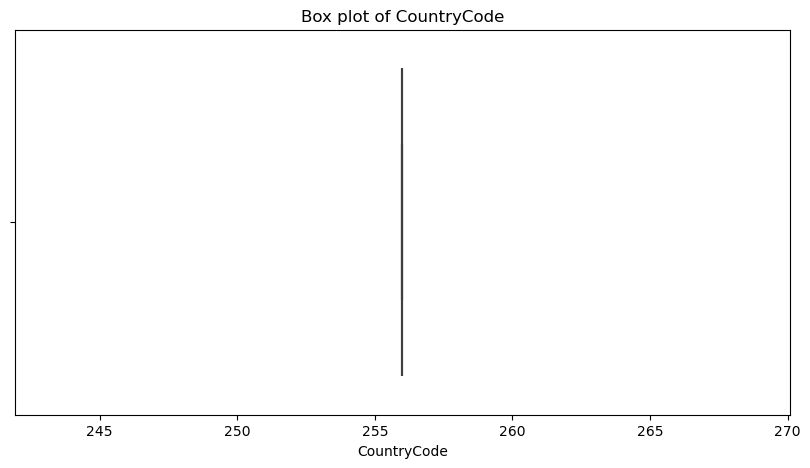

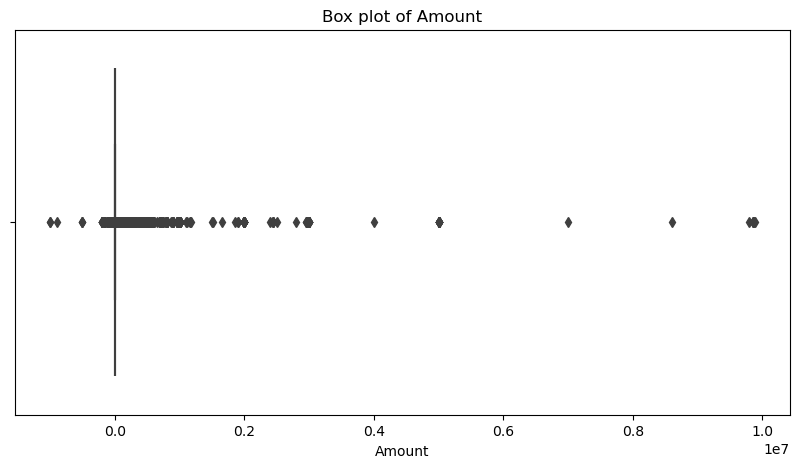

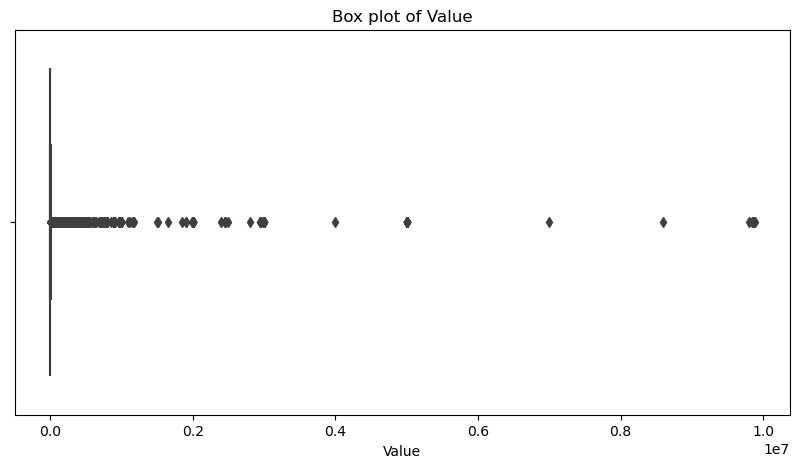

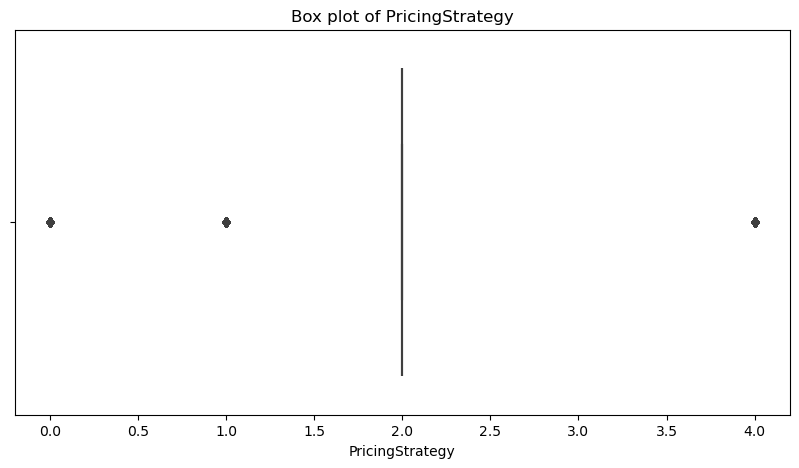

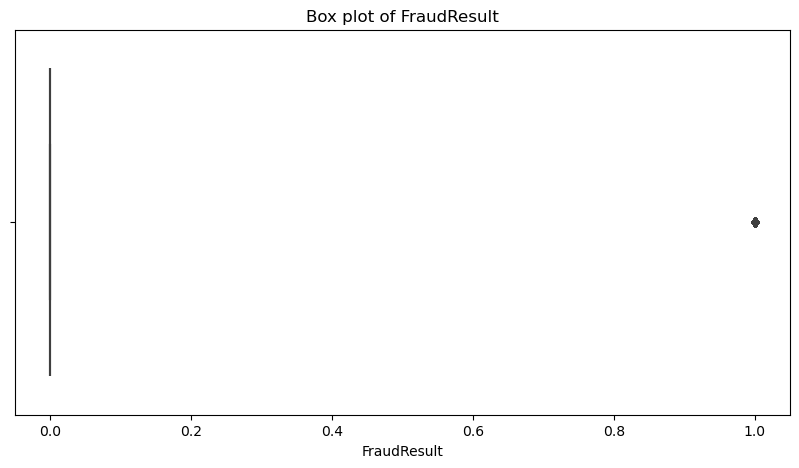

In [16]:
# Outlier Detection
for column in numeric_columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=data[column])
    plt.title(f'Box plot of {column}')
    plt.show()